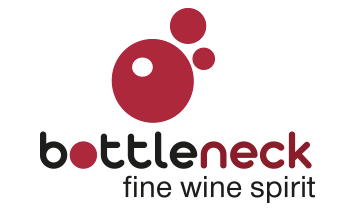

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import statistics
import datetime
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Scénario
Aujourd’hui est un grand jour, vous commencez votre mission en tant que data analyst freelance chez BottleNeck, un marchand de vin très prestigieux. Votre manager sur cette mission (Laurent) vous accueille chaleureusement et vous propose de partager un petit café avec le reste de l’équipe du service Numérique. L’ambiance est bonne, et vous voilà déjà parfaitement intégré dans cette équipe détendue mais professionnelle.

# Mission

* Simplifier la gestion des stocks 
* Améliorer notre visibilité en termes d’analyse des ventes 

# Sommaire
**Données**
- Compréhension des données

**Rapprochement des deux exports**
- Fichier web
- Fichier liaison
- Fichier erp
- Jointure df_erp et df_web

**Le Chiffre d’Affaires**
- Le CA réalisé en ligne
- Le CA réalisé par produit
- Le CA réalisé par date de publication

**Analyse sur la variable 'prix'**
- Mediane
- Quantiles
- Ecart interquantiles
- La variance
- L'ecart type
- Boxplot

**Gestion de stock**
- Le surstockage
- Le sous-stockage

**Conclusion**

# Données

- Compréhension des données

## Compréhension des données
Chargement des 3 fichiers csv avec la fonction read_csv de Pandas
<br> Utilisation des fonctions **head(), info() et describe()**

In [2]:
df_erp= pd.read_excel("erp.xlsx")
df_web= pd.read_excel("web.xlsx")
df_liaison= pd.read_excel("liaison.xlsx")

Compréhension des données

In [3]:
df_erp.head()

product_id  onsale_web  price  stock_quantity stock_status
0        3847           1   24.2               0   outofstock
1        3849           1   34.3               0   outofstock
2        3850           1   20.8               0   outofstock
3        4032           1   14.1               0   outofstock
4        4039           1   46.0               0   outofstock

In [4]:
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [5]:
df_erp.describe()

product_id  onsale_web       price  stock_quantity
count   825.000000  825.000000  825.000000      825.000000
mean   5162.597576    0.869091   32.415636       26.496970
std     902.644635    0.337506   26.795849       45.892422
min    3847.000000    0.000000    5.200000        0.000000
25%    4348.000000    1.000000   14.600000        1.000000
50%    4907.000000    1.000000   24.400000       11.000000
75%    5805.000000    1.000000   42.000000       34.000000
max    7338.000000    1.000000  225.000000      578.000000

In [6]:
df_web.head()

sku  virtual  downloadable  rating_count  average_rating  \
0  bon-cadeau-25-euros        0             0             0             0.0   
1                15298        0             0             0             0.0   
2                15296        0             0             0             0.0   
3                15300        0             0             0             0.0   
4                19814        0             0             0             0.0   

   total_sales tax_status  tax_class  post_author           post_date  ...  \
0         10.0    taxable        NaN          1.0 2018-06-01 13:53:46  ...   
1          6.0    taxable        NaN          2.0 2018-02-08 12:58:52  ...   
2          0.0    taxable        NaN          2.0 2018-02-08 13:49:41  ...   
3          0.0    taxable        NaN          2.0 2018-02-08 14:08:36  ...   
4          3.0    taxable        NaN          2.0 2018-02-09 14:01:05  ...   

                                           post_name       post_modified  \
0                             bon-cadeau-de-25-euros 2018-06-01 14:13:57   
1        pierre-jean-villa-saint-joseph-preface-2018 2019-12-30 09:30:29   
2          pierre-jean-villa-saint-joseph-tilde-2017 2019-12-21 09:00:17   
3  pierre-jean-villa-croze-hermitage-accroche-coe... 2020-06-26 18:15:03   
4                  pierre-jean-villa-igp-gamine-2018 2020-01-04 16:36:01   

    post_modified_gmt post_content_filtered post_parent  \
0 2018-06-01 12:13:57                   NaN         0.0   
1 2019-12-30 08:30:29                   NaN         0.0   
2 2019-12-21 08:00:17                   NaN         0.0   
3 2020-06-26 16:15:03                   NaN         0.0   
4 2020-01-04 15:36:01                   NaN         0.0   

                                                guid menu_order  post_type  \
0  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   
1  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   
2  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   
3  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   
4  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   

  post_mime_type comment_count  
0            NaN           0.0  
1            NaN           0.0  
2            NaN           0.0  
3            NaN           0.0  
4            NaN           0.0  

[5 rows x 28 columns]

In [7]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [8]:
df_web.describe()

virtual  downloadable  rating_count  average_rating  total_sales  \
count   1513.0        1513.0        1513.0          1430.0  1430.000000   
mean       0.0           0.0           0.0             0.0     4.006993   
std        0.0           0.0           0.0             0.0     8.510559   
min        0.0           0.0           0.0             0.0     0.000000   
25%        0.0           0.0           0.0             0.0     0.000000   
50%        0.0           0.0           0.0             0.0     1.000000   
75%        0.0           0.0           0.0             0.0     4.000000   
max        0.0           0.0           0.0             0.0    96.000000   

       tax_class  post_author  post_content  post_password  \
count        0.0  1430.000000           0.0            0.0   
mean         NaN     1.998601           NaN            NaN   
std          NaN     0.037385           NaN            NaN   
min          NaN     1.000000           NaN            NaN   
25%          NaN     2.000000           NaN            NaN   
50%          NaN     2.000000           NaN            NaN   
75%          NaN     2.000000           NaN            NaN   
max          NaN     2.000000           NaN            NaN   

       post_content_filtered  post_parent  menu_order  comment_count  
count                    0.0       1430.0      1430.0         1430.0  
mean                     NaN          0.0         0.0            0.0  
std                      NaN          0.0         0.0            0.0  
min                      NaN          0.0         0.0            0.0  
25%                      NaN          0.0         0.0            0.0  
50%                      NaN          0.0         0.0            0.0  
75%                      NaN          0.0         0.0            0.0  
max                      NaN          0.0         0.0            0.0

In [9]:
df_liaison.head()

product_id id_web
0        3847  15298
1        3849  15296
2        3850  15300
3        4032  19814
4        4039  19815

In [10]:
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [11]:
df_liaison.describe()

product_id
count   825.000000
mean   5162.597576
std     902.644635
min    3847.000000
25%    4348.000000
50%    4907.000000
75%    5805.000000
max    7338.000000

# Rapprochement des deux exports 


pour réaliser cette étude, nous prendrons 3 les fichiers :

* df_web : 
  - supprimer les valeurs manquantes de la colonne Sku > 1428 lignes
  - supprimer les doublons de la colonne Sku > 714 lignes
  - supprimer les colonnes inutiles

* df_liaison
  - supprimer les doublons de la colonne product id + valeurs manquantes/nulles
  - supprimer les doublons de la colonne web id + valeurs manquantes/nulles > 731 lignes

* df_erp : 826 lignes > 714 lignes

In [12]:
df_liaison.dropna(axis=0)

product_id   id_web
0          3847    15298
1          3849    15296
2          3850    15300
3          4032    19814
4          4039    19815
..          ...      ...
792        7023    15891
793        7025    15887
822        7247  13127-1
823        7329  14680-1
824        7338    16230

[734 rows x 2 columns]

## df_web 
* Supprimer les doublons du dataframe > 714 lignes
* Supprimer les colonnes inutiles, manque de pertinence ou nulles ou 0



In [13]:
profileweb = ProfileReport(df_web, title="Rapport de la base de donnée WEB")

In [14]:
profileweb

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
df_web.columns

Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

In [16]:
df_web.loc[df_web['sku'].duplicated(keep=False),:]

sku  virtual  downloadable  rating_count  \
0     bon-cadeau-25-euros        0             0             0   
1                   15298        0             0             0   
2                   15296        0             0             0   
3                   15300        0             0             0   
4                   19814        0             0             0   
...                   ...      ...           ...           ...   
1508                16135        0             0             0   
1509                15891        0             0             0   
1510                15887        0             0             0   
1511              13127-1        0             0             0   
1512                16230        0             0             0   

      average_rating  total_sales tax_status  tax_class  post_author  \
0                0.0         10.0    taxable        NaN          1.0   
1                0.0          6.0    taxable        NaN          2.0   
2                0.0          0.0    taxable        NaN          2.0   
3                0.0          0.0    taxable        NaN          2.0   
4                0.0          3.0    taxable        NaN          2.0   
...              ...          ...        ...        ...          ...   
1508             0.0          5.0        NaN        NaN          2.0   
1509             0.0          0.0        NaN        NaN          2.0   
1510             0.0          0.0        NaN        NaN          2.0   
1511             0.0          0.0        NaN        NaN          2.0   
1512             0.0          0.0        NaN        NaN          2.0   

               post_date  ...  \
0    2018-06-01 13:53:46  ...   
1    2018-02-08 12:58:52  ...   
2    2018-02-08 13:49:41  ...   
3    2018-02-08 14:08:36  ...   
4    2018-02-09 14:01:05  ...   
...                  ...  ...   
1508 2020-04-25 13:22:38  ...   
1509 2020-05-02 14:53:40  ...   
1510 2020-05-02 15:00:54  ...   
1511 2020-06-09 15:42:04  ...   
1512 2020-07-20 11:00:00  ...   

                                              post_name       post_modified  \
0                                bon-cadeau-de-25-euros 2018-06-01 14:13:57   
1           pierre-jean-villa-saint-joseph-preface-2018 2019-12-30 09:30:29   
2             pierre-jean-villa-saint-joseph-tilde-2017 2019-12-21 09:00:17   
3     pierre-jean-villa-croze-hermitage-accroche-coe... 2020-06-26 18:15:03   
4                     pierre-jean-villa-igp-gamine-2018 2020-01-04 16:36:01   
...                                                 ...                 ...   
1508                    mouthes-le-bihan-aime-chai-2015 2020-08-26 17:35:03   
1509         camin-larredya-jurancon-sec-la-virada-2018 2020-08-26 17:35:02   
1510             jamet-cote-rotie-fructus-voluptas-2018 2020-08-14 18:15:03   
1511     clos-du-mont-olivet-chateauneuf-du-pape-2007-2 2020-07-20 17:09:06   
1512  domaine-saint-nicolas-fiefs-vendeens-blanc-les... 2020-08-13 10:45:03   

       post_modified_gmt post_content_filtered post_parent  \
0    2018-06-01 12:13:57                   NaN         0.0   
1    2019-12-30 08:30:29                   NaN         0.0   
2    2019-12-21 08:00:17                   NaN         0.0   
3    2020-06-26 16:15:03                   NaN         0.0   
4    2020-01-04 15:36:01                   NaN         0.0   
...                  ...                   ...         ...   
1508 2020-08-26 15:35:03                   NaN         0.0   
1509 2020-08-26 15:35:02                   NaN         0.0   
1510 2020-08-14 16:15:03                   NaN         0.0   
1511 2020-07-20 15:09:06                   NaN         0.0   
1512 2020-08-13 08:45:03                   NaN         0.0   

                                                   guid menu_order  \
0     https://www.bottle-neck.fr/?post_type=product&...        0.0   
1     https://www.bottle-neck.fr/?post_type=product&...        0.0   
2     https://www.bottle-neck.fr/?post_type=product&...        

In [17]:
df_web.loc[df_web['sku']=='bon-cadeau-25-euros']

sku  virtual  downloadable  rating_count  \
0     bon-cadeau-25-euros        0             0             0   
1209  bon-cadeau-25-euros        0             0             0   

      average_rating  total_sales tax_status  tax_class  post_author  \
0                0.0         10.0    taxable        NaN          1.0   
1209             0.0         10.0        NaN        NaN          1.0   

               post_date  ...               post_name       post_modified  \
0    2018-06-01 13:53:46  ...  bon-cadeau-de-25-euros 2018-06-01 14:13:57   
1209 2018-06-01 13:53:46  ...  bon-cadeau-de-25-euros 2018-06-01 14:13:57   

       post_modified_gmt post_content_filtered post_parent  \
0    2018-06-01 12:13:57                   NaN         0.0   
1209 2018-06-01 12:13:57                   NaN         0.0   

                                                   guid menu_order  \
0     https://www.bottle-neck.fr/?post_type=product&...        0.0   
1209  https://www.bottle-neck.fr/wp-content/uploads/...        0.0   

       post_type post_mime_type comment_count  
0        product            NaN           0.0  
1209  attachment     image/jpeg           0.0  

[2 rows x 28 columns]

In [18]:
df_web=df_web[['sku','total_sales','post_title','post_date','tax_status']]

In [19]:
df_web_tax=df_web[df_web['tax_status']=='taxable']

In [20]:
df_web_tax.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 798
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sku          714 non-null    object        
 1   total_sales  716 non-null    float64       
 2   post_title   716 non-null    object        
 3   post_date    716 non-null    datetime64[ns]
 4   tax_status   716 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 33.6+ KB


In [21]:
df_web_tax.dropna(axis=0,inplace=True)

In [22]:
df_web_tax.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sku          714 non-null    object        
 1   total_sales  714 non-null    float64       
 2   post_title   714 non-null    object        
 3   post_date    714 non-null    datetime64[ns]
 4   tax_status   714 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 33.5+ KB


## df_liaison
- Renommer la colonne 'id_web' en 'sku'
- supprimer les doublons de la colonne web id + valeurs manquantes/nulles > 731 lignes

In [23]:
profileliaison = ProfileReport(df_liaison, title="Rapport de la base de donnée Liaison")

In [24]:
profileliaison

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
df_liaison.columns

Index(['product_id', 'id_web'], dtype='object')

In [26]:
df_liaison=df_liaison.rename(columns ={'id_web': 'sku'})

In [27]:
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


Fichier liaison col sku = 734 rows et fichier web col sku=714 rows

Recuperer les valeurs de la colonnes sku du **fichier web** et conserver uniquement ces valeurs dans le **fichier liaison**

Fichier liaison col sku = 714 rows et fichier web col sku=714 rows

In [28]:
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


### Jointure df web et df liaison

In [29]:
df_web_liaison=pd.merge(df_liaison,df_web_tax, on='sku',how="left")

In [30]:
df_web_liaison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   product_id   825 non-null    int64         
 1   sku          734 non-null    object        
 2   total_sales  714 non-null    float64       
 3   post_title   714 non-null    object        
 4   post_date    714 non-null    datetime64[ns]
 5   tax_status   714 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 45.1+ KB


## df_erp
df_erp : 826 lignes alors que nos autres fichiers sont à 714

Recuperer les valeurs de la colonnes id_product du **fichier erp** et conserver uniquement ces valeurs dans le **fichier liaison**

In [31]:
profileerp = ProfileReport(df_erp, title="Rapport de la base de donnée ERP")
profileerp

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
df_erp

product_id  onsale_web  price  stock_quantity stock_status
0          3847           1   24.2               0   outofstock
1          3849           1   34.3               0   outofstock
2          3850           1   20.8               0   outofstock
3          4032           1   14.1               0   outofstock
4          4039           1   46.0               0   outofstock
..          ...         ...    ...             ...          ...
820        7203           0   45.0              30      instock
821        7204           0   45.0               9      instock
822        7247           1   54.8              23      instock
823        7329           0   26.5              14      instock
824        7338           1   16.3              45      instock

[825 rows x 5 columns]

## Jointure df_erp et df_web

In [33]:
df_erp_web=pd.merge(df_erp,df_web_liaison, on='product_id', how='inner')

In [34]:
df_erp_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   product_id      825 non-null    int64         
 1   onsale_web      825 non-null    int64         
 2   price           825 non-null    float64       
 3   stock_quantity  825 non-null    int64         
 4   stock_status    825 non-null    object        
 5   sku             734 non-null    object        
 6   total_sales     714 non-null    float64       
 7   post_title      714 non-null    object        
 8   post_date       714 non-null    datetime64[ns]
 9   tax_status      714 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 70.9+ KB


In [35]:
profileerp = ProfileReport(df_erp_web, title="Rapport de la base de donnée ERP-WEB")
profileerp

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Le Chiffre d’Affaires

In [36]:
#vérification des valeurs nulles
df_erp_web.isna().sum()

#Utilisation de la fonction fillna()
df_erp_web=df_erp_web.fillna(0)

## Le CA réalisé en ligne

In [37]:
#Selection des ventes onsale web uniquement
df_erp_web_onsale=df_erp_web[df_erp_web['onsale_web']==1]

#Calcul CA par produit et stockage dans une nouvelle feature CA_produit
df_erp_web_onsale['CA_produit']=df_erp_web_onsale.apply(lambda x : x['price']*x['total_sales'],axis=1)

#Calcul de la somme CA totale
CA_produit_total=df_erp_web_onsale['CA_produit'].sum()

#Affichage CA produit total avec la fonction print()
print(f'Le chiffre d’affaires total est de : {round(CA_produit_total,2)} euros')

Le chiffre d’affaires total est de : 70568.6 euros


## Le nombre de produit total

In [38]:
# nombre produit
nb_produit=len(df_erp_web_onsale['product_id'])

#Affichage CA produit total avec la fonction print()
print(f'Il y a {nb_produit} produits')

Il y a 717 produits


## Le nombre de produit avec un chiffre d'affaires supérieur à 0

In [39]:
#Filtre Dataframe avec donnée 'CA' > 0
df_erp_web_onsale_sup_0=df_erp_web_onsale[df_erp_web_onsale['CA_produit']>0]

# nombre produit avec un CA supérieur à 0
nb_produit_supérieur_0=len(df_erp_web_onsale_sup_0['product_id'])

#Affichage CA produit >0 avec la fonction print()
print(f'Il y a {nb_produit_supérieur_0} produits dont le CA est > 0')

Il y a 385 produits dont le CA est > 0


In [40]:
#Affichage CA = 0
nb_produit_0=nb_produit-nb_produit_supérieur_0
print(f'Il y a {nb_produit_0} produits dont le CA est = 0')

Il y a 332 produits dont le CA est = 0


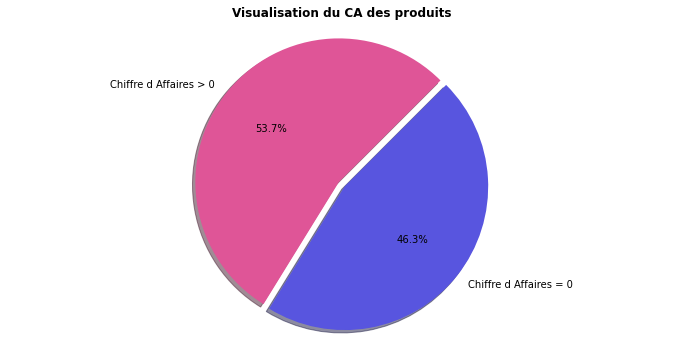

In [41]:
fig = plt.figure(figsize= [12,6])
labels = 'Chiffre d Affaires > 0', 'Chiffre d Affaires = 0'
sizes = [nb_produit_supérieur_0,nb_produit_0]
explode = (0, 0.05)  
#add colors
colors = ['#DF5597','#5855DF']

ax = fig.add_subplot()
ax.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True,startangle=45)
ax.axis('equal')  
ax.set_title('Visualisation du CA des produits',fontweight="bold")
plt.show()


### Visualisation du CA en fonction des Produits

In [43]:
#création d'une dataframe avec uniquement produit et CA
df_CA_produit=df_erp_web_onsale[['product_id','CA_produit']]

#Tri par ordre décroissant
df_CA_produit.sort_values(by='CA_produit',ascending=False, inplace=True)

#CA par produit 
df_CA_produit['CA_produit'].describe()

count     717.000000
mean       98.422036
std       307.106168
min         0.000000
25%         0.000000
50%        15.200000
75%        91.000000
max      4704.000000
Name: CA_produit, dtype: float64

* 717 produits
* 25% des produits ne génèrent aucun CA
* 50% des produits génèrent un CA de 15,2 eur
* 75% des produits génèrent un CA de 91 eur
* CA max = 4704 eur

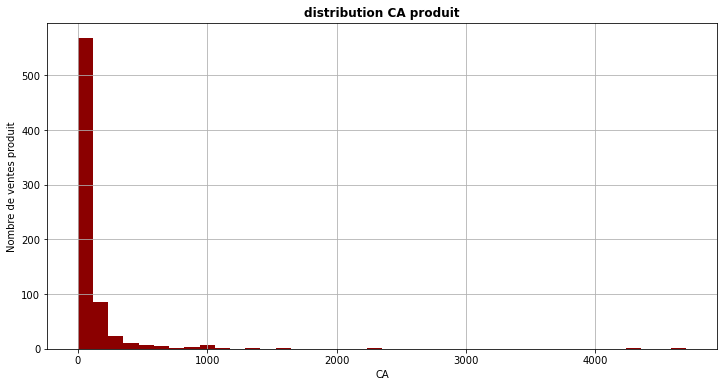

In [44]:
# graphique distribution CA produit 
plt.figure(figsize= [12,6])
df_CA_produit['CA_produit'].plot(kind='hist',color='darkred', bins = 40)
plt.title("distribution CA produit",fontweight="bold")
plt.ylabel("Nombre de ventes produit")
plt.xlabel("CA")
plt.grid()
plt.show()

In [45]:
y =  df_CA_produit["CA_produit"].tolist()

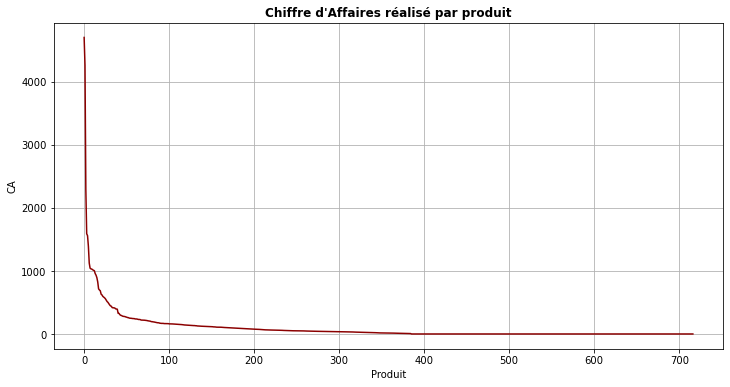

In [46]:
# graphique distribution CA produit
fig= plt.figure(figsize= [12,6])
ax = fig.add_subplot()
ax.plot(y, color='darkred')
ax.set_title("Chiffre d'Affaires réalisé par produit",fontweight="bold")
ax.set_xlabel("Produit")
ax.set_ylabel("CA")
ax.grid()

In [47]:
## Concentration CA (Lorenz)
dep = df_CA_produit['CA_produit']
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = round(2*S,2)
gini

0.81

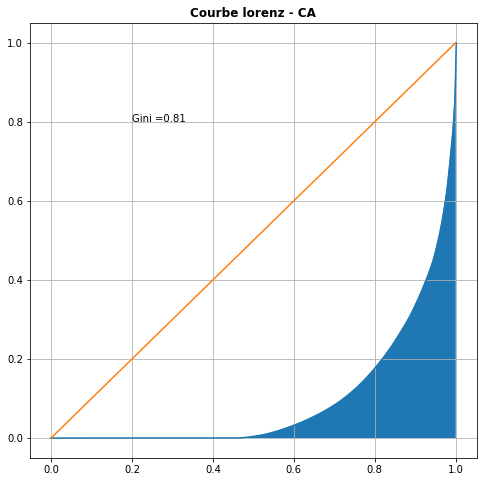

In [48]:
#Graphique concentration des CA
plt.figure(figsize= [8,8])
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz)
ident = [0.0, 1.0]
plt.plot(ident,ident)
plt.fill_between(np.linspace(0,1,len(lorenz)), lorenz)
plt.text(0.2,0.8,"Gini ="+ str(gini))
plt.title("Courbe lorenz - CA",fontweight="bold")
plt.grid()
plt.show()

### Visualisation du CA en fonction des Produits >0

In [53]:
#création d'une dataframe avec uniquement produit et CA
df_CA_produit_sup_0=df_erp_web_onsale_sup_0[['product_id','CA_produit']]

#Tri par ordre décroissant
df_CA_produit_sup_0.sort_values(by='CA_produit',ascending=False, inplace=True)

#CA par produit 
df_CA_produit_sup_0['CA_produit'].describe()

count     385.000000
mean      183.295065
std       400.324073
min         6.500000
25%        38.600000
50%        81.600000
75%       164.400000
max      4704.000000
Name: CA_produit, dtype: float64

* 385 produits
* 25% des produits génèrent un CA inférieur ou égal à 38.6 eur
* 50% des produits génèrent un CA inférieur ou égal à 81.6 eur
* CA max = 4704 eur

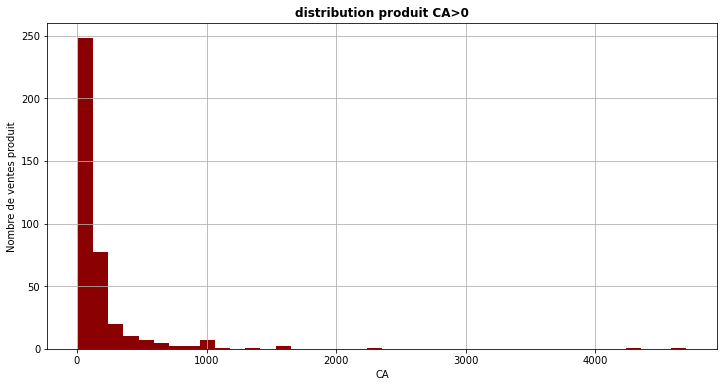

In [54]:
# graphique distribution produit CA  >0
plt.figure(figsize= [12,6])
df_CA_produit_sup_0['CA_produit'].plot(kind='hist',color='darkred', bins = 40)
plt.title("distribution produit CA>0",fontweight="bold")
plt.ylabel("Nombre de ventes produit")
plt.xlabel("CA")
plt.grid()
plt.show()

In [ ]:
y =  df_CA_produit_sup_0['CA_produit'].tolist()

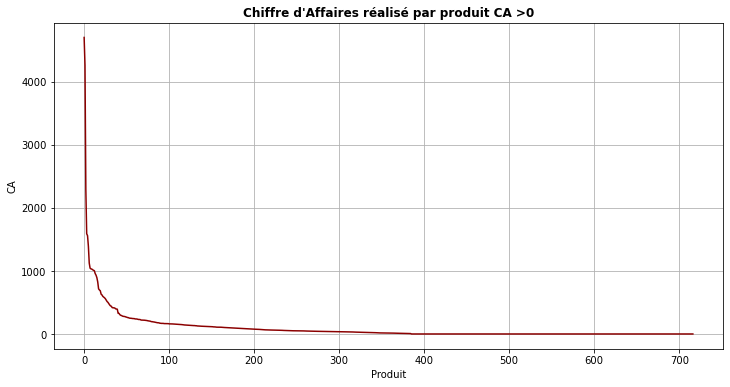

In [58]:
# graphique distribution CA produit
fig= plt.figure(figsize= [12,6])
ax = fig.add_subplot()
ax.plot(y, color='darkred')
ax.set_title("Chiffre d'Affaires réalisé par produit CA >0",fontweight="bold")
ax.set_xlabel("Produit")
ax.set_ylabel("CA")
ax.grid()

In [59]:
## Concentration CA>0 (Lorenz)
dep = df_CA_produit_sup_0['CA_produit']
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = round(2*S,2)
gini

0.64

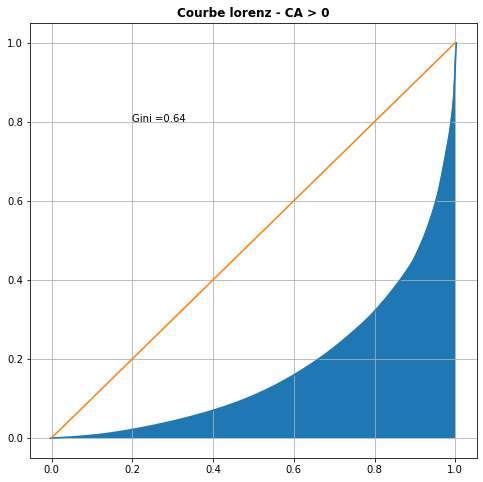

In [60]:
#Graphique concentration des CA >0
plt.figure(figsize= [8,8])
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz)
ident = [0.0, 1.0]
plt.plot(ident,ident)
plt.fill_between(np.linspace(0,1,len(lorenz)), lorenz)
plt.text(0.2,0.8,"Gini ="+ str(gini))
plt.title("Courbe lorenz - CA > 0",fontweight="bold")
plt.grid()
plt.show()

Text(0, 0.5, 'Prix')

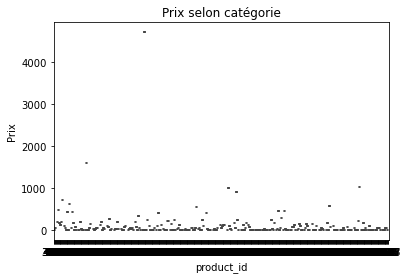

In [49]:
# Graphique selon catégorie
sns.boxplot( x=df_CA_produit['product_id'], y=df_CA_produit['CA_produit'])
plt.title("Prix selon catégorie")
plt.ylabel("Prix")

## Le CA en fonction de l'année de publication

<AxesSubplot:title={'center':'CA en fonction de la publication '}, xlabel='post_date'>

<Figure size 864x432 with 0 Axes>

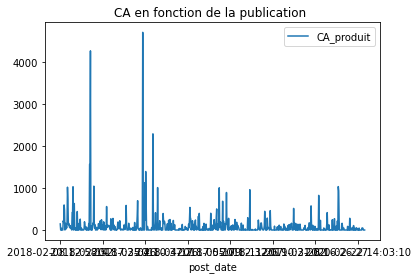

In [50]:
# graphique distribution CA produit en fonction de la publication
plt.figure(figsize= [12,6])
df_erp_web_onsale.plot(x="post_date",
                y="CA_produit",
                title="CA en fonction de la publication ")

In [51]:
df=df_erp_web.set_index('post_date')

In [52]:
df['ANNEE']= df.index.year

AttributeError: 'Index' object has no attribute 'year'

In [ ]:
df['MOIS'] =df.index.month_name()

In [ ]:
df['JOUR']=df.index.day_name()

In [ ]:
df['HEURE']=df.index.hour

In [ ]:
df_annee=df[['CA','ANNEE','MOIS','JOUR','HEURE']]

In [ ]:
df_annee['ANNEE'].value_counts()

In [ ]:
fig = px.histogram(df_annee, x="ANNEE", y="CA", histfunc='sum',text_auto=True,color_discrete_sequence=['goldenrod'])
fig.show()

## Le CA en fonction du mois de publication

In [ ]:
fig = px.histogram(df_annee, x="MOIS", y="CA", histfunc='sum',text_auto=True,color_discrete_sequence=['tan'])
fig.show()

Nous manquons de données, généralement la période la plus chargée dans le monde du vin, c’est celle des foires aux vins. Elle s’étend généralement de fin août à mi-octobre selon les enseignes.

## Le CA en fonction du jour de publication

In [ ]:
fig = px.histogram(df_annee, x="JOUR", y="CA", histfunc='sum',text_auto=True,color_discrete_sequence=['indianred'])
fig.show()

## Le CA en fonction de l'heure de publication

In [ ]:
fig = px.histogram(df_annee, x="HEURE", y="CA", histfunc='sum',text_auto=True,color_discrete_sequence=['burlywood'])
fig.show()

# Analyse Univariée sur la feature 'prix' 

* Calculer la médiane
* Calculer les quantiles
* L’écart interquartile
* La variance
* L’écart-type (Standard Deviation)

## Calculer la médiane

In [ ]:
median_prix=df_erp_web['price'].median()

In [ ]:
print(f'La Mediane de la feature prix est de : {round(median_prix,2)} euros')

## Calculer les quantiles

In [ ]:
# On calcule le quantile 0,25 qui est le quartile Q1
Q1 = round(np.percentile(df_erp_web['price'], 25))
print("Quartile Q1 vaut : ", Q1)

In [ ]:
# On calcule le quantile 0,75 qui est le quartile Q3
Q3 = round(np.percentile(df_erp_web['price'], 75))
print("Quartile Q3 vaut : ", Q3)

## L’écart interquartile

In [ ]:
# L ecart interquartile est Q3 - Q1
print("L ecart interquartile vaut : ", Q3 - Q1)

## La variance

In [ ]:
variance = np.var(df_erp_web['price'])
print ("La variance de la feature prix est de : ", round(variance, 2))

## L’écart-type (Standard Deviation)

In [ ]:
ecartType = np.std(df_erp_web['price'])
print ("Le ecart type de la feature prix est de : ", round(ecartType, 2))

In [ ]:
df_erp_web.head(3)

In [ ]:
df_sale=df_erp_web[['product_id','price','CA']]

In [ ]:
df_sale.head(3)

## Boxplot 

In [ ]:
sns.boxplot(y=df_sale['price'])

Les mesures de forme

In [ ]:
#Le Skewness empirique
df_erp_web['price'].skew()

Le skewness est une mesure d'asymétrie. L’asymétrie d’une distribution traduit la régularité (ou non) avec laquelle les observations se répartissent autour de la valeur centrale. On interprète cette mesure de cette manière :

Si γ1=0 alors la distribution est symétrique.

Si γ1>0 alors la distribution est étalée à droite.

Si γ1<0 alors la distribution est étalée à gauche.

In [ ]:
#Le Kurtosis empirique
df_erp_web['price'].kurtosis()

Le kurtosis empirique n'est pas une mesure d'asymétrie, mais c'est une mesure d'aplatissement. L’aplatissement peut s’interpréter à la condition que la distribution soit symétrique. En fait, on compare l'aplatissement par rapport à la distribution la plus célèbre, appelée distribution normale (parfois "courbe de Gauss" ou "Gaussienne"). Vous l'avez probablement déjà vue, elle ressemble à cela :s’interprète comme ceci :

Si γ2=0 , alors la distribution a le même aplatissement que la distribution normale.

Si γ2>0 , alors elle est moins aplatie que la distribution normale : les observations sont plus concentrées.

Si γ2<0 , alors les observations sont moins concentrées : la distribution est plus aplatie.

# Gestion de Stock

## Visualisation du surstockage

Le surstockage se traduit par des coûts importants et par un risque d’obsolescence. 

In [ ]:
df_erp_web.head(3)

In [ ]:
df_erp_web['valeur stock'] = df_erp_web['price']*df_erp_web['stock_quantity']

In [ ]:
total_stock=df_erp_web['valeur stock'].sum()

In [ ]:
print(f'La valeur totale du stock est de : {round(total_stock,2)} euros')

In [ ]:
df_erp_web.sort_values(by='valeur stock',ascending=False, inplace=True)

In [ ]:
df_stock_CA_0=df_erp_web[df_erp_web['CA']==0]

In [ ]:
df_stock_CA_0.head()

In [ ]:
total_stock_CA_0=df_stock_CA_0['valeur stock'].sum()

In [ ]:
print(f'La valeur totale du stock pour un CA à 0 eur est de : {round(total_stock_CA_0,2)} euros')

In [ ]:
fig = plt.figure(figsize= [12,6])
labels = 'Valeur du stocks ayant générés du CA', 'Valeur du stock sans CA associé'
sizes = [total_stock-total_stock_CA_0,total_stock_CA_0]
explode = (0, 0.5)  
#add colors
colors = ['#ff9999','#66b3ff']

ax = fig.add_subplot()
ax.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=0 )
ax.axis('equal')  
ax.set_title('Visualisation de la valeur du stock en fonction du CA',fontweight="bold")
plt.show()

Nous observons que plus de 40% de la valeur du stock n'a généré aucun CA depuis 2018, il s'agit pour l'entreprise de cout et un argent 'dormant' qui ne peut pas servir à investir dans d'autres produits et ou des améliorations  

## Visualisation des produit en sous-stockage

Il peut se traduire par un arrêt de la production, un article non-disponible lors d’une vente

In [ ]:
df_erp_web.sort_values(by='total_sales',ascending=False, inplace=True)

# Conclusion

L’exploration univariée est à appliquer sur les features qui nous paraissent pertinentes pour résoudre le problème métier. En fonction de ce résumé statistique, nous pourrons émettre certaines hypothèses concernant le modèle prédictif.

Toutefois, l’analyse univariée n’est qu’une partie de l’exploration des données. L’analyse multivariée permet de comprendre les relations entre les features et à quel degré ces dernières agissent sur le phénomène à modéliser.

La méthode de réapprovisionnement 

Ciblage et segmentation, l'entreprise se revendique etre un marchant de vin prestigieux mais commercialise des vins à 5.9eur
sa plus grosse part de vente s'effectue sur la tranche de 20 à 39eur